## 1. RGB Color Space

(128, 128, 3)


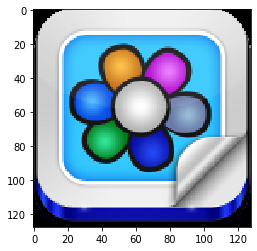

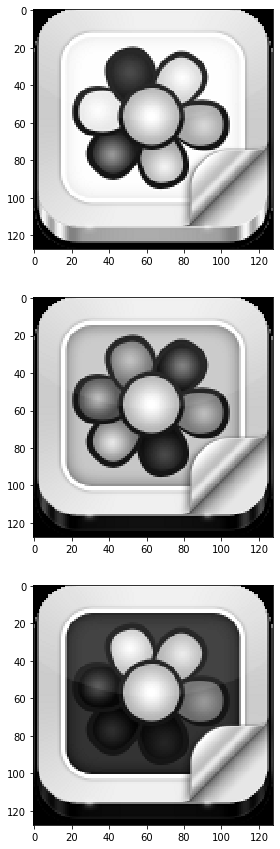

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('image1.png')
print(img.shape)
plt.imshow(img)
plt.show()

b=img[:,:,0]
g=img[:,:,1]
r=img[:,:,2]

plt.figure(figsize=(5*3,5*3), constrained_layout=False)
plt.subplot(311)
plt.imshow(r,'gray')
plt.subplot(312)
plt.imshow(g,'gray')
plt.subplot(313)
plt.imshow(b,'gray')
plt.show()

## Applications of RGB Color Space

(128, 128, 3)
(240, 240, 3)


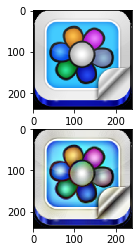

In [13]:
# Enhancement of images
# Contrast linked adaptive histogram equalization
# For highlighting certain features in input image

def equalize_clahe_color(img):
    """Equalize the image splitting the image applying CLAHE to each channel
    and merging the results
    """

    cla = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    channels = cv2.split(img)
    eq_channels = []
    
    # Each channel
    for ch in channels:
        eq_channels.append(cla.apply(ch))

    eq_image = cv2.merge(eq_channels)
    return eq_image

img1=cv2.imread('image1.png')
print(img1.shape)
img=cv2.resize(img1, (240,240))
print(img.shape)
ahe_img=equalize_clahe_color(img)

plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(ahe_img)
plt.show()

## Problems

We lose "naturalness" of image and other info
1. Significant perceptual non-uniformity
2. Mixing of chrominance and luminance data


## 2. YUV Color Space

(128, 128, 3)


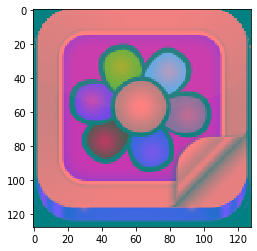

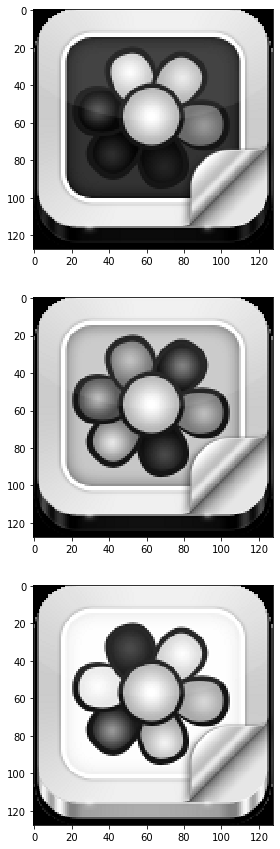

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread('image1.png')
yuv=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
print(yuv.shape)
plt.imshow(yuv)
plt.show()

y=img[:,:,0]
u=img[:,:,1]
v=img[:,:,2]

plt.figure(figsize=(5*3,5*3), constrained_layout=False)
plt.subplot(311)
plt.imshow(y,'gray')
plt.subplot(312)
plt.imshow(u,'gray')
plt.subplot(313)
plt.imshow(v,'gray')
plt.show()

## Applications of YUV

(128, 128, 3)
(240, 240, 3)


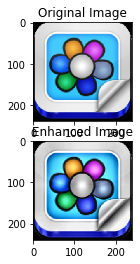

In [2]:
# Enhancement of images

import cv2
import numpy as np
import matplotlib.pyplot as plt

def equalize_clahe_color_yuv(img):
    yuv=cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y,u,v=cv2.split(yuv)
    
    #Apply clahe to l-channel
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl=clahe.apply(y) #only y has intensity info
    
    #Merge enhanced l-channel with u and v
    limg=cv2.merge((cl,u,v))
    
    final=cv2.cvtColor(limg, cv2.COLOR_YUV2BGR)
    return final
    
img1=cv2.imread('image1.png')
print(img1.shape)
img=cv2.resize(img1, (240,240))
print(img.shape)
final=equalize_clahe_color_yuv(img)

plt.subplot(211)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(212)
plt.imshow(final)
plt.title('Enhanced Image')
plt.show()

We don't lose the "naturalness"

## 3. YCbCr Color space

The YCrCb color space is derived from the RGB color space and has the following three compoenents.

1. Y – Luminance or Luma component obtained from RGB after gamma correction.
2. Cr = R – Y ( how far is the red component from Luma ).
3. Cb = B – Y ( how far is the blue component from Luma ).

The YCrCb color space has the following properties.

Separates the luminance and chrominance components into different channels.
Mostly used in compression (of Cr and Cb components ) for TV Transmission.
Device dependent.

(128, 128, 3)


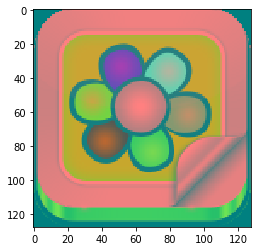

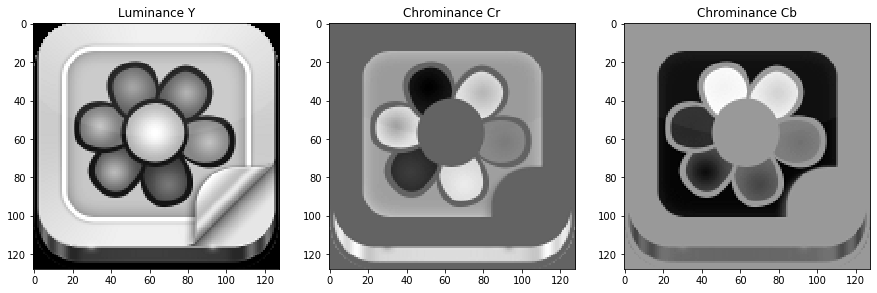

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('image1.png')
ycrcb=cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
print(ycrcb.shape)
plt.imshow(ycrcb)
plt.show()

# converting individual band/channel
y=ycrcb[:,:,0]
cr=ycrcb[:,:,1]
cb=ycrcb[:,:,2]
# Displaying individual band/channel
plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,3,1)
plt.imshow(y,'gray')
plt.title('Luminance Y')
plt.subplot(1,3,2)
plt.imshow(cr,'gray')
plt.title('Chrominance Cr')
plt.subplot(1,3,3)
plt.imshow(cb,'gray')
plt.title('Chrominance Cb')
plt.show()

## Subsampling of Chrominance Channels

The YCrCb color space is used, because the human eyes are less sensitive to chrominance changes than to luminance changes.
Hence the chrominance channels can be subsampled in a lossy compression procedure. If the following code snippet is attached to the code described above, the chrominance channels are first filtered with a box filter of size (2,2).
The filtered subchannels are then subsampled by a factor of 2 in both, the vertical and the horizontal direction.
This yields a compression of the entire image (all 3 channels) by a factor of 2.:



(128, 128, 3)


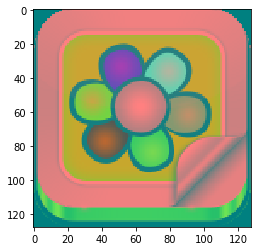

128


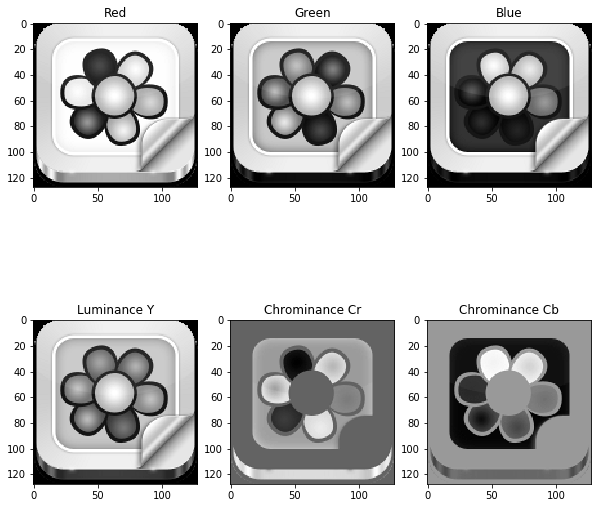

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img1 = cv2.imread('image1.png')
transcol=cv2.cvtColor(img1,cv2.COLOR_BGR2YCrCb)
print(transcol.shape)
plt.imshow(transcol)
plt.show()

## Apply fox filter 
crf=cv2.boxFilter(transcol[:,:,1],ddepth=-1,ksize=(2,2))
cbf=cv2.boxFilter(transcol[:,:,2],ddepth=-1,ksize=(2,2))
print(crf[0,0])
SSV=2
SSH=2
crsub=crf[::SSV,::SSH]
cbsub=cbf[::SSV,::SSH]


# Displaying individual band/channel
plt.figure(figsize=(5*2, 5*2), constrained_layout=False)
plt.subplot(2,3,1)
plt.imshow(img1[:,:,2],cmap="gray")
plt.title('Red')
plt.subplot(2,3,2)
plt.imshow(img1[:,:,1],cmap="gray")
plt.title('Green')
plt.subplot(2,3,3)
plt.imshow(img1[:,:,0],cmap="gray")
plt.title('Blue')

plt.subplot(2,3,4)
plt.imshow(transcol[:,:,0],cmap="gray")
plt.title('Luminance Y')
plt.subplot(2,3,5)
plt.imshow(transcol[:,:,1],cmap="gray")
plt.title('Chrominance Cr')
plt.subplot(2,3,6)
plt.imshow(transcol[:,:,2],cmap="gray")
plt.title('Chrominance Cb')
plt.show()

## Applications of YCrCb Color space

(128, 128, 3)
(240, 240, 3)
(240, 240, 3)


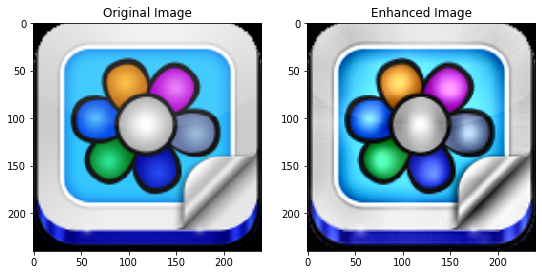

In [20]:
# Enhancement of Color Image in YCbCr color format
import cv2
import matplotlib.pyplot as plt

def equalize_clahe_color_ycrcb(img):

    ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

    # -----Splitting the LAB image to different channels-------------------------
    y, cr, cb = cv2.split(ycrcb)

    # -----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(y)

    # -----Merge the CLAHE enhanced L-channel with the u and v channel-----------
    ylimg = cv2.merge((cl, cr, cb))

    # -----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(ylimg,cv2.COLOR_YCrCb2BGR)
          
    return final 


# Create the dimensions of the figure and set title: 
## Calling function
img1 = cv2.imread('image1.png')
print(img1.shape)
# Resize image into 160x160 
img = cv2.resize(img1, (240, 240)) 
print(img.shape)
final = equalize_clahe_color_ycrcb(img)
print(final.shape)
plt.figure(figsize=(3*3, 3*3), constrained_layout=False)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(final)
plt.title('Enhanced Image')
plt.show()

## 4. HSV color format

First of all, I converted the BGR image (blue, green, and red channel) to the HSV format (Hue, Saturation, and Value channel). This allows us to perform the CLAHE algorithm only on the value channel. We don’t want to mess up the hue or saturation of the image.

Before I go further, let me explain HSV:
1. Hue: The term for the pure spectrum colours commonly referred to by something called “colour names” — red, orange, yellow, blue, green, and violet — which appear in the hue circle.
2. Saturation: Refers to the intensity of colour in an image. Primary colours — red, blue, and yellow are considered the purest as they are fully saturated. When saturation increases, colours are perceived as purer.
3. Value: Refers to the lightness or darkness of a colour. An image without hue or saturation is a grayscale image

(128, 128, 3)


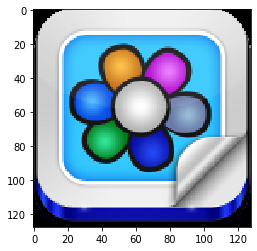

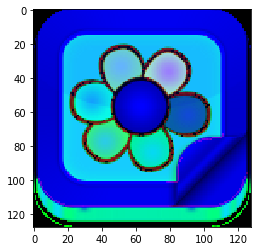

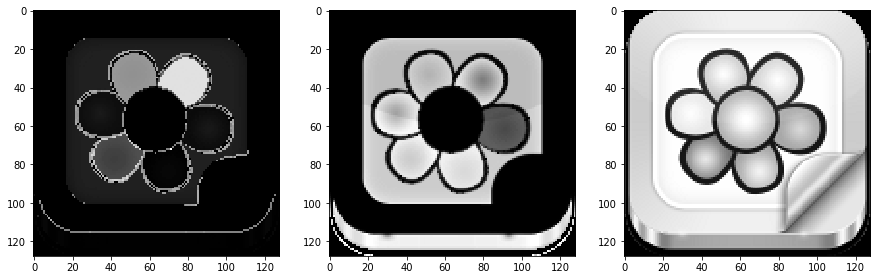

In [17]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('image1.png')
print(img.shape)
plt.imshow(img)
plt.show()
#Convert hsv
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.show()

# converting individual band/channel
h=hsv[:,:,0]
s=hsv[:,:,1]
v=hsv[:,:,2]
# Displaying individual band/channel
plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,3,1)
plt.imshow(h,'gray')
plt.subplot(1,3,2)
plt.imshow(s,'gray')
plt.subplot(1,3,3)
plt.imshow(v,'gray')
plt.show()

## Applications of HSV Color space

(128, 128, 3)
(240, 240, 3)


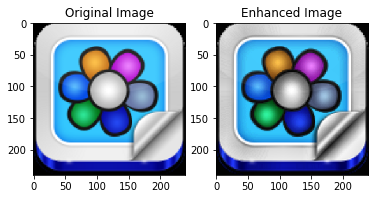

In [21]:
# Enhancement of Color Image in HSV color format
import cv2
import numpy as np
import matplotlib.pyplot as plt


def equalize_clahe_color_hsv(img):

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # -----Splitting the HSV image to different channels-------------------------
    h, s, v = cv2.split(hsv)

    # -----Applying CLAHE to V-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cv = clahe.apply(v)

    # -----Merge the CLAHE enhanced V-channel with the a and b channel-----------
    hsv_en= cv2.merge((h, s,  cv))

    # -----Converting image from HSV Color model to RGB model--------------------
    final = cv2.cvtColor(hsv_en, cv2.COLOR_HSV2BGR)

    return final 


## Calling function
img1 = cv2.imread('image1.png')
print(img1.shape)
# Resize image into 160x160 
img = cv2.resize(img1, (240, 240)) 
print(img.shape)
final  = equalize_clahe_color_hsv(img)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(final)
plt.title('Enhanced Image')
plt.show()

## 5. The LAB Color-Space

The Lab color space has three components.

1. L – Lightness ( Intensity ).
2. a – color component ranging from Green to Magenta.
3. b – color component ranging from Blue to Yellow.

The Lab color space is quite different from the RGB color space. In RGB color space the color information is separated into three channels but the same three channels also encode brightness information. On the other hand, in Lab color space, the L channel is independent of color information and encodes brightness only. The other two channels encode color.

It has the following properties.

1. Perceptually uniform color space which approximates how we perceive color.
2. Independent of device ( capturing or displaying ).
3. Used extensively in Adobe Photoshop.



(128, 128, 3)


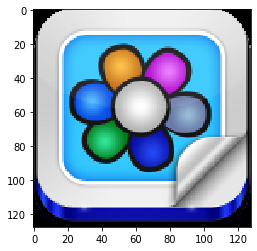

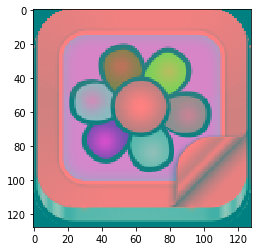

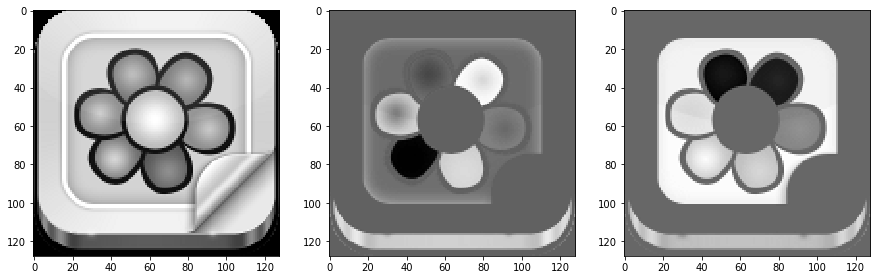

In [23]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('image1.png')
print(img.shape)
plt.imshow(img)
plt.show()
#Convert hsv
lab=cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
plt.imshow(lab)
plt.show()

# converting individual band/channel
l=lab[:,:,0]
a=lab[:,:,1]
b=lab[:,:,2]
# Displaying individual band/channel
plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,3,1)
plt.imshow(l,'gray')
plt.subplot(1,3,2)
plt.imshow(a,'gray')
plt.subplot(1,3,3)
plt.imshow(b,'gray')
plt.show()



## Applications of LAB Color space

(128, 128, 3)
(240, 240, 3)


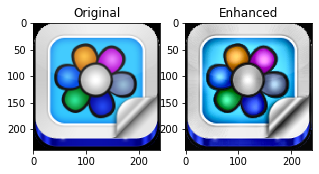

In [28]:
# Enhancement of Color Image in LAB color format
import cv2
import numpy as np
import matplotlib.pyplot as plt

# defining CLAHE function
def equalize_clahe_color_lab(img):

    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # -----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)

    # -----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl, a, b))

    # -----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    return final 

## Calling function
img1 = cv2.imread('image1.png')
print(img1.shape)
# Resize image into 160x160 
img = cv2.resize(img1, (240, 240)) 
print(img.shape)
final =equalize_clahe_color_lab(img)

plt.figure(figsize=(5, 5), constrained_layout=False)
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(final)
plt.title('Enhanced')
plt.show()